In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
vehicleData = pd.read_csv("vehicle.csv")
vehicleData.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [5]:
#there are some fields which do not have any numbers, so we will replace them with median values
vehicleData.isnull().sum().T

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
vehicleData.shape

(846, 19)

In [7]:
vehicleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [8]:
#instead of dropping the rows, lets replace the missing values with median value.
vehicleData.iloc[:,0:18].median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [9]:
#instead of dropping the rows, lets replace the missing values with median value.
for i in vehicleData.columns[:18]:
    median_value = vehicleData[i].median(numeric_only=False,axis=0)
    vehicleData[i] = vehicleData[i].fillna(median_value)

In [10]:
vehicleData.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [11]:
vehicleData.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

# Outliers detection using box plot - analysing 10 in the first set and another 10 in the second so that the graph can be visualized for each data element

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1800 with 0 Axes>

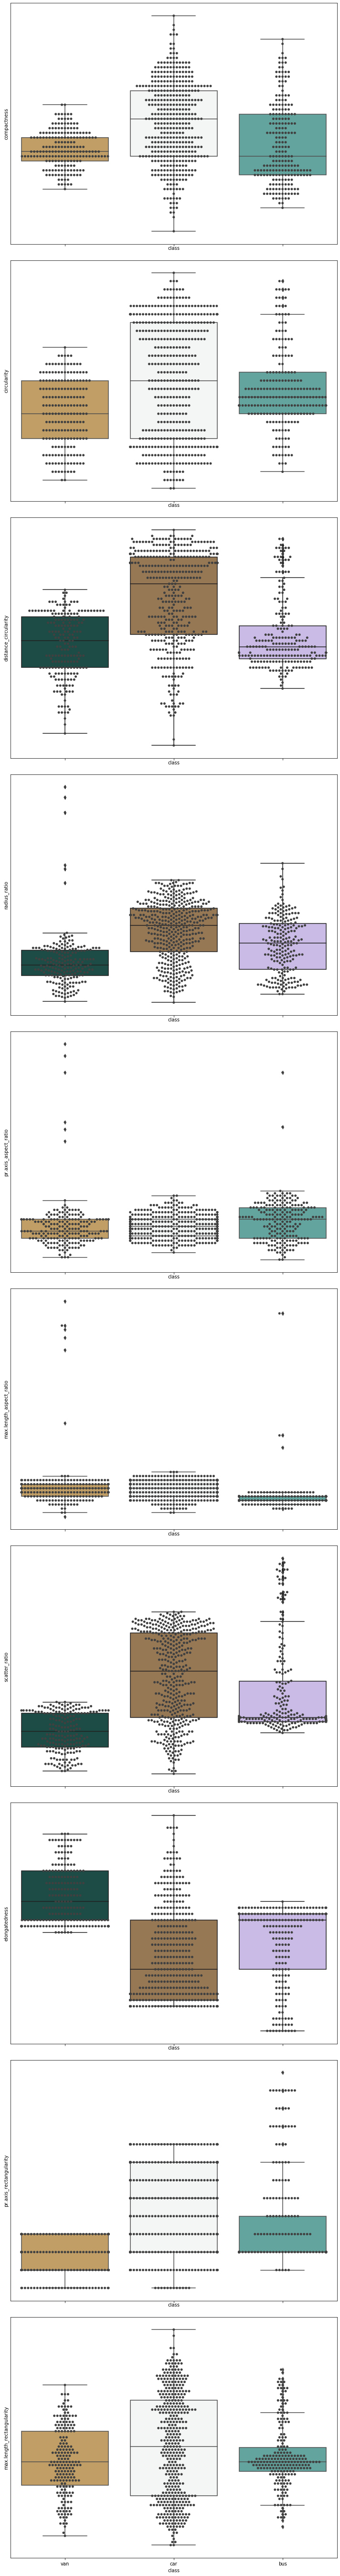

In [12]:
plt.figure(figsize=(20,25))

f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(10, 1, figsize=(10, 75), sharex=True)

sns.boxplot(x="class",y="compactness",data=vehicleData,palette="BrBG",ax=ax1)
sns.swarmplot(x="class",y="compactness",data=vehicleData,color="0.25",ax=ax1)

sns.boxplot(x="class",y="circularity",data=vehicleData,palette="BrBG",ax=ax2)
sns.swarmplot(x="class",y="circularity",data=vehicleData,color="0.25",ax=ax2)

sns.boxplot(x="class",y="distance_circularity",data=vehicleData,palette="cubehelix",ax=ax3)
sns.swarmplot(x="class",y="distance_circularity",data=vehicleData,color="0.25",ax=ax3)

sns.boxplot(x="class",y="radius_ratio",data=vehicleData,palette="cubehelix",ax=ax4)
sns.swarmplot(x="class",y="radius_ratio",data=vehicleData,color="0.25",ax=ax4)

sns.boxplot(x="class",y="pr.axis_aspect_ratio",data=vehicleData,palette="BrBG",ax=ax5)
sns.swarmplot(x="class",y="pr.axis_aspect_ratio",data=vehicleData,color="0.25",ax=ax5)

sns.boxplot(x="class",y="max.length_aspect_ratio",data=vehicleData,palette="BrBG",ax=ax6)
sns.swarmplot(x="class",y="max.length_aspect_ratio",data=vehicleData,color="0.25",ax=ax6)

sns.boxplot(x="class",y="scatter_ratio",data=vehicleData,palette="cubehelix",ax=ax7)
sns.swarmplot(x="class",y="scatter_ratio",data=vehicleData,color="0.25",ax=ax7)

sns.boxplot(x="class",y="elongatedness",data=vehicleData,palette="cubehelix",ax=ax8)
sns.swarmplot(x="class",y="elongatedness",data=vehicleData,color="0.25",ax=ax8)

sns.boxplot(x="class",y="pr.axis_rectangularity",data=vehicleData,palette="BrBG",ax=ax9)
sns.swarmplot(x="class",y="pr.axis_rectangularity",data=vehicleData,color="0.25",ax=ax9)

sns.boxplot(x="class",y="max.length_rectangularity",data=vehicleData,palette="BrBG",ax=ax10)
sns.swarmplot(x="class",y="max.length_rectangularity",data=vehicleData,color="0.25",ax=ax10)

plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1800 with 0 Axes>

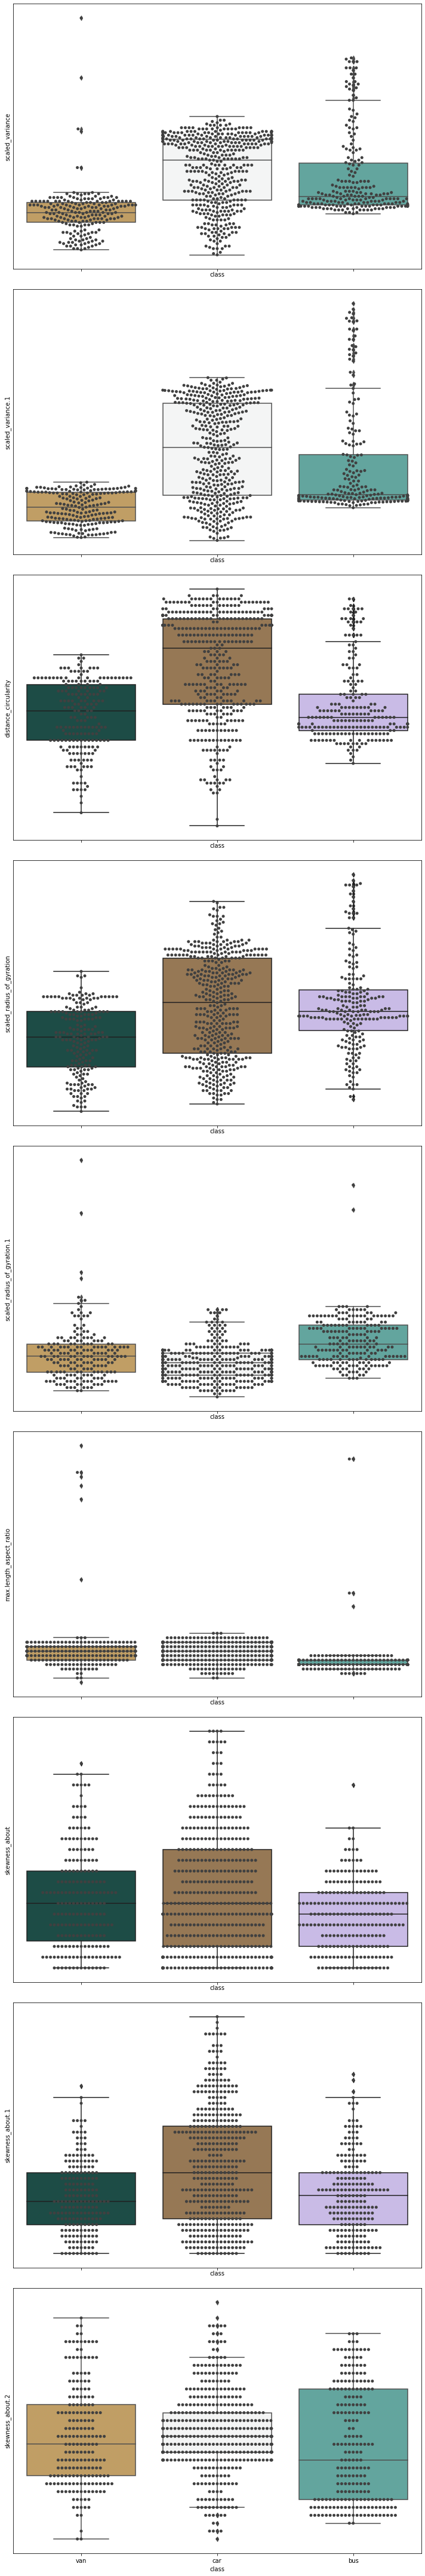

In [13]:
plt.figure(figsize=(20,25))

f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(9, 1, figsize=(10, 60), sharex=True)

sns.boxplot(x="class",y="scaled_variance",data=vehicleData,palette="BrBG",ax=ax1)
sns.swarmplot(x="class",y="scaled_variance",data=vehicleData,color="0.25",ax=ax1)

sns.boxplot(x="class",y="scaled_variance.1",data=vehicleData,palette="BrBG",ax=ax2)
sns.swarmplot(x="class",y="scaled_variance.1",data=vehicleData,color="0.25",ax=ax2)

sns.boxplot(x="class",y="distance_circularity",data=vehicleData,palette="cubehelix",ax=ax3)
sns.swarmplot(x="class",y="distance_circularity",data=vehicleData,color="0.25",ax=ax3)

sns.boxplot(x="class",y="scaled_radius_of_gyration",data=vehicleData,palette="cubehelix",ax=ax4)
sns.swarmplot(x="class",y="scaled_radius_of_gyration",data=vehicleData,color="0.25",ax=ax4)

sns.boxplot(x="class",y="scaled_radius_of_gyration.1",data=vehicleData,palette="BrBG",ax=ax5)
sns.swarmplot(x="class",y="scaled_radius_of_gyration.1",data=vehicleData,color="0.25",ax=ax5)

sns.boxplot(x="class",y="max.length_aspect_ratio",data=vehicleData,palette="BrBG",ax=ax6)
sns.swarmplot(x="class",y="max.length_aspect_ratio",data=vehicleData,color="0.25",ax=ax6)

sns.boxplot(x="class",y="skewness_about",data=vehicleData,palette="cubehelix",ax=ax7)
sns.swarmplot(x="class",y="skewness_about",data=vehicleData,color="0.25",ax=ax7)

sns.boxplot(x="class",y="skewness_about.1",data=vehicleData,palette="cubehelix",ax=ax8)
sns.swarmplot(x="class",y="skewness_about.1",data=vehicleData,color="0.25",ax=ax8)

sns.boxplot(x="class",y="skewness_about.2",data=vehicleData,palette="BrBG",ax=ax9)
sns.swarmplot(x="class",y="skewness_about.2",data=vehicleData,color="0.25",ax=ax9)

sns.boxplot(x="class",y="hollows_ratio",data=vehicleData,palette="BrBG",ax=ax10)
sns.swarmplot(x="class",y="hollows_ratio",data=vehicleData,color="0.25",ax=ax10)

plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show

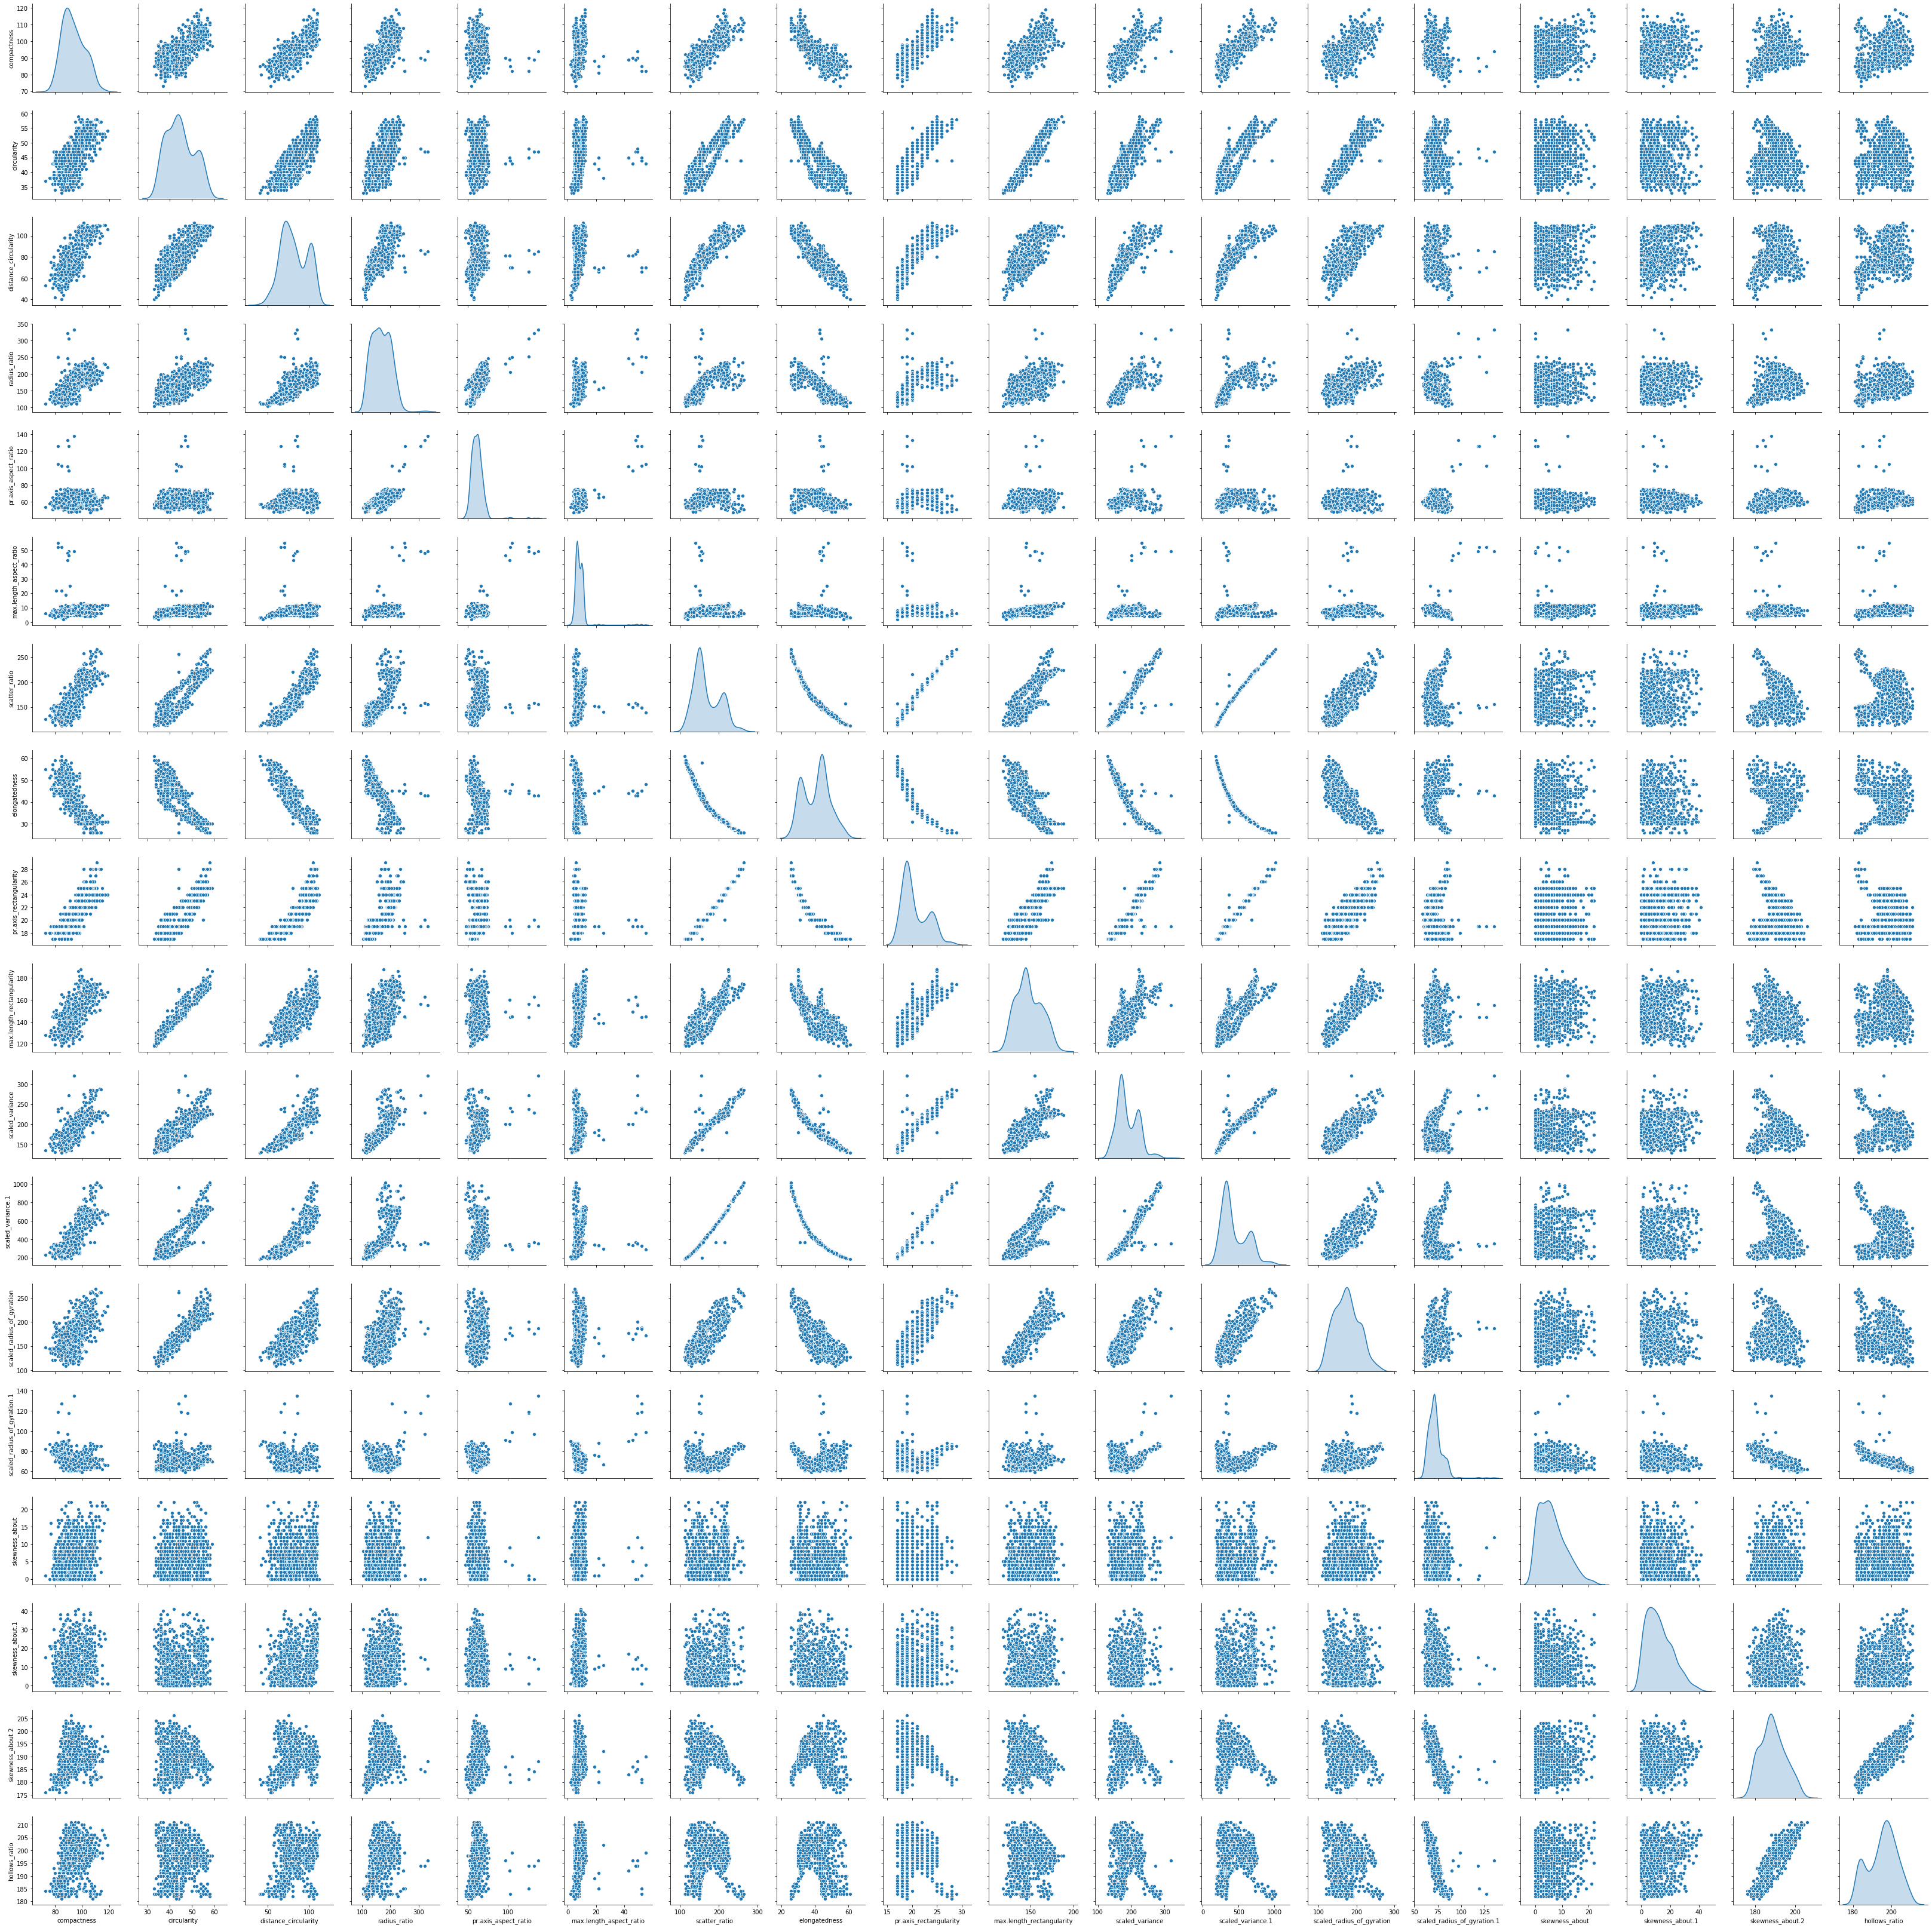

In [14]:
 #EDA - compare all attributes visually to check for relationships that can be exploited
sns.pairplot(vehicleData,diag_kind='kde')

# We can see a strong correlation between many attributes. 
For ex: 
1. Compactness has positive correlation with circularity, distance circularity, radius ratio, scaled variance, scaled variance 1
2. Compactness has negative correlation with elongatedness
3. Circularity has positive correlation with scatter ratio, maxlength_rectangularity, scaled variance, scaled variance1, scaled_radiues, scaled_radius_gyration
4. Elongatednedd has negative correlation with compactness, circularity, scatter ratio, pr axis_rectangularity, scaled_variance, scaled_variance1,scaled_radius_of_gyration
      

In [15]:
# We will perform same experiment with GridSearch
from sklearn.model_selection import train_test_split

X = vehicleData.drop("class" , axis=1)
y = vehicleData.pop("class")

# could get better results with a model with a test size of 0.7 and train size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.70, random_state=42)

In [16]:
# run the Support vector classifier along with identifying the right set of parameters using grid search.
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#for kernel='rbf' gamma=scaled C=1,10,100,1000
#for kernel='poly' gamma=scaled C=1,10,100,1000

parameters = {'kernel':('poly', 'rbf'), 'C':(1,10,100,1000),'cache_size':[3000],'gamma':['scale']}
svc = svm.SVC()
print(svc.get_params())
clf = GridSearchCV(svc, parameters,n_jobs= -1)
clf.fit(X_train, y_train)
print("Score for training data::",clf.score(X_train, y_train))
print("Score for testing data::",clf.score(X_test, y_test)) 

print("Best set of hyper parameters:::",clf.best_params_)

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score for training data:: 0.9841897233201581
Score for testing data:: 0.9460370994940978
Best set of hyper parameters::: {'C': 1000, 'cache_size': 3000, 'gamma': 'scale', 'kernel': 'rbf'}


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
# K-fold cross-validation - tried with different folds - 5, 10, 20 and found that the 
# accuracy scores are consistent even after splitting into different folds.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=65)
results = cross_val_score(clf,X, y, cv=kfold)
print("CV matrix for fold of 10 \n",results)
    
print("Mean for fold of 10", results.mean())

kfold = KFold(n_splits=5, random_state=100)
results = cross_val_score(clf,X, y, cv=kfold)
print("CV matrix for fold of 5 \n",results)
    
print("Mean for fold of 10", results.mean())

kfold = KFold(n_splits=20, random_state=8153)
results = cross_val_score(clf,X, y, cv=kfold)
print("CV matrix for fold of 20 \n",results)
    
print("Mean for fold of 10", results.mean())


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv wil

CV matrix for fold of 10 
 [0.96470588 1.         0.96470588 0.97647059 0.97647059 0.96470588
 1.         0.98809524 0.97619048 0.98809524]
Mean for fold of 10 0.9799439775910365


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv wil

CV matrix for fold of 5 
 [0.98235294 0.97633136 0.96449704 0.99408284 0.97633136]
Mean for fold of 10 0.9787191089453533


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv wil

CV matrix for fold of 20 
 [0.93023256 1.         1.         1.         0.97674419 0.95348837
 0.97619048 1.         0.95238095 1.         0.92857143 0.97619048
 1.         1.         0.97619048 1.         0.95238095 1.
 0.97619048 1.        ]
Mean for fold of 10 0.9799280177187153


In [18]:
# Performing PCA to extract the key set of features 
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Initially calculate Z-scores
x_zcores=X.apply(zscore)
x_zcores.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [19]:
# Calculate the covariance matrix
cov_matrix = np.cov(x_zcores,rowvar=False)
print(cov_matrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [20]:
# extract the principal components, we will use 'mle' so that the algo determines the components
pca = PCA(n_components='mle')
pca.fit(cov_matrix)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
# explained variance by each vector
print(pca.explained_variance_)

[2.64359471e+00 5.15004300e-01 1.79210044e-01 8.10412220e-02
 3.50448377e-02 1.70007960e-02 7.55655586e-03 2.20107414e-03
 1.38536135e-03 4.94047701e-04 2.54317394e-04 1.20645234e-04
 4.50907436e-05 2.55337005e-05 1.92936209e-05 7.12688952e-06
 4.90435577e-06]


In [22]:
# variance ratio for each vector
print(pca.explained_variance_ratio_)

[7.58997194e-01 1.47861855e-01 5.14526375e-02 2.32675833e-02
 1.00616533e-02 4.88106456e-03 2.16954765e-03 6.31945997e-04
 3.97748328e-04 1.41845048e-04 7.30165586e-05 3.46382119e-05
 1.29459133e-05 7.33092970e-06 5.53935294e-06 2.04618700e-06
 1.40807978e-06]


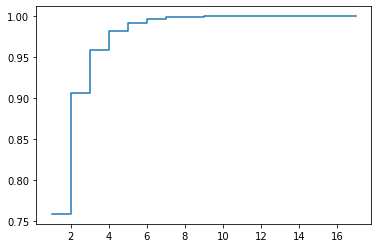

In [23]:
sns.lineplot(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_),drawstyle='steps-post')

# so first 7 principal components are sufficent to explain 95% of the variance. So perform dimensionality reduction 

In [24]:
pca3 = PCA(n_components=7)
pca3.fit(x_zcores)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(x_zcores)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

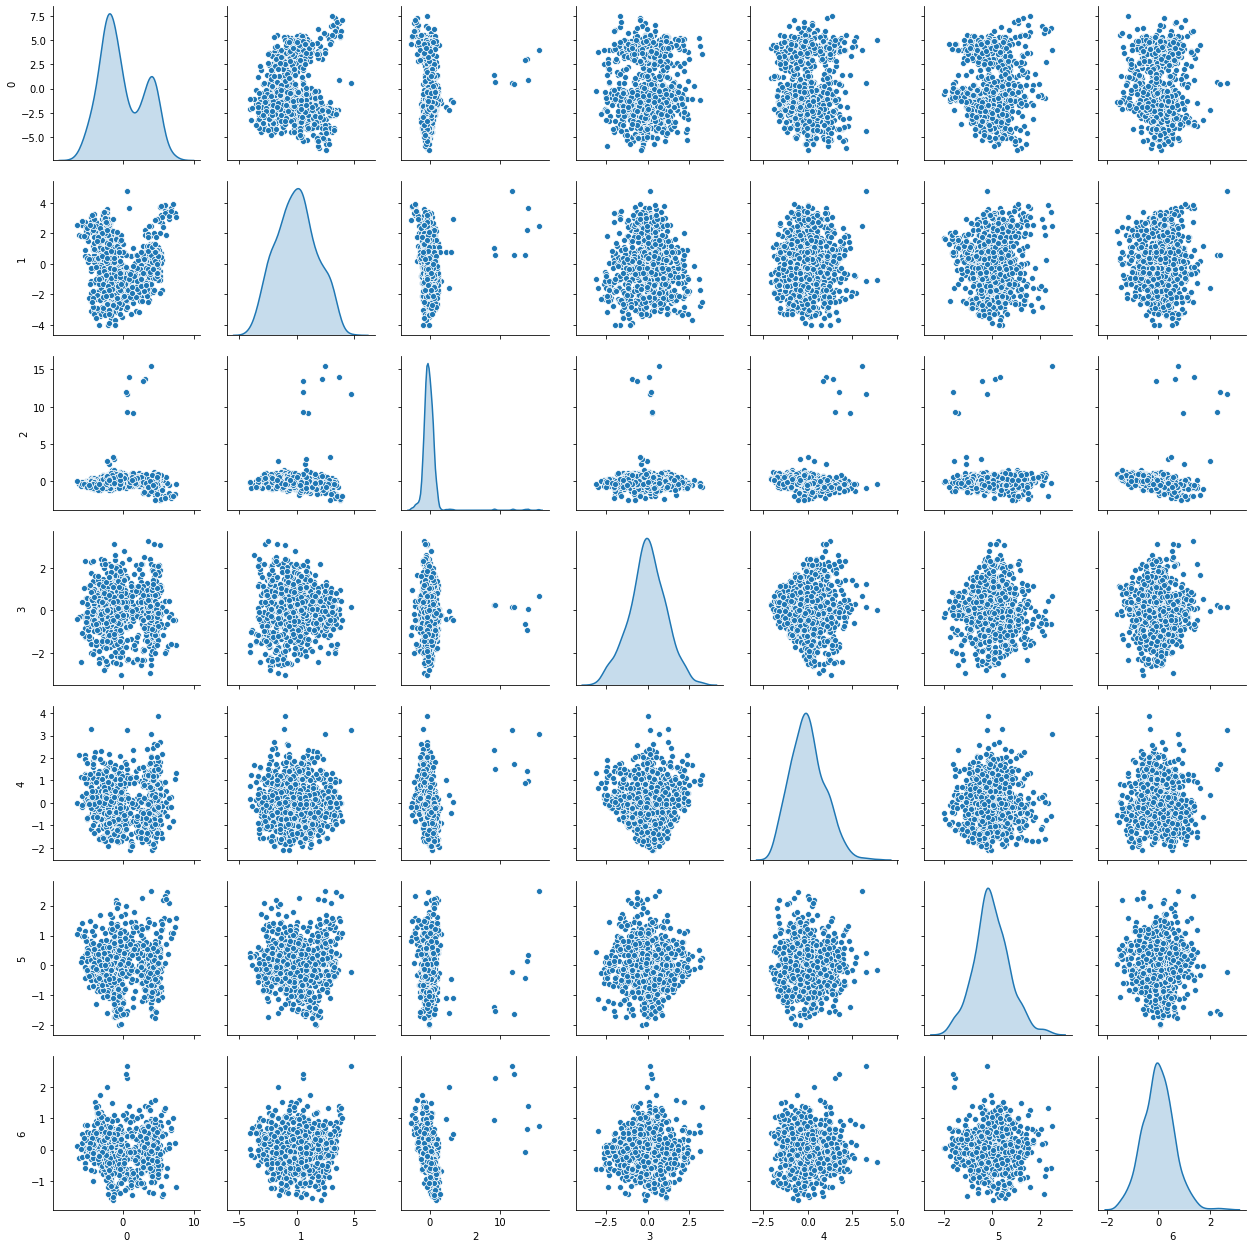

In [25]:
sns.pairplot(pd.DataFrame(Xpca3),diag_kind='kde')

In [26]:
# We will perform same experiment with GridSearch
from sklearn.model_selection import train_test_split

# could get better results with a model with a test size of 0.7 and train size=0.3
X_train_pca3, X_test_pca3, y_train_pca3, y_test_pca3 = train_test_split(Xpca3, y, test_size=.70, random_state=42)

In [27]:
# run the Support vector classifier along with identifying the right set of parameters using grid search.
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#for kernel='rbf' gamma=scaled C=1,10,100,1000
#for kernel='poly' gamma=scaled C=1,10,100,1000

parameters = {'kernel':('poly', 'rbf'), 'C':(1,10,100,1000),'cache_size':[3000],'gamma':['scale']}
svc = svm.SVC()
print(svc.get_params())
clf = GridSearchCV(svc, parameters,n_jobs= -1)
clf.fit(X_train_pca3, y_train_pca3)
print("Score for training data::",clf.score(X_train_pca3, y_train_pca3))
print("Score for testing data::",clf.score(X_test_pca3, y_test_pca3)) 

print("Best set of hyper parameters:::",clf.best_params_)

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score for training data:: 0.9683794466403162
Score for testing data:: 0.8954468802698144
Best set of hyper parameters::: {'C': 10, 'cache_size': 3000, 'gamma': 'scale', 'kernel': 'rbf'}


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
# K-fold cross-validation - tried with different folds - 5, 10, 20 and found that the 
# accuracy scores are consistent even after splitting into different folds.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=65)
results = cross_val_score(clf,Xpca3, y, cv=kfold)
print("CV matrix for fold of 10 \n",results)
    
print("Mean for fold of 10", results.mean())

kfold = KFold(n_splits=5, random_state=100)
results = cross_val_score(clf,Xpca3, y, cv=kfold)
print("CV matrix for fold of 5 \n",results)
    
print("Mean for fold of 5", results.mean())

kfold = KFold(n_splits=20, random_state=8153)
results = cross_val_score(clf,Xpca3, y, cv=kfold)
print("CV matrix for fold of 20 \n",results)
    
print("Mean for fold of 20", results.mean())



/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv wil

CV matrix for fold of 10 
 [0.95294118 0.94117647 0.91764706 0.92941176 0.95294118 0.97647059
 0.91666667 0.9047619  0.97619048 0.9047619 ]
Mean for fold of 10 0.937296918767507


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv wil

CV matrix for fold of 5 
 [0.94117647 0.91715976 0.95266272 0.91715976 0.93491124]
Mean for fold of 5 0.9326139923424991


/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv wil

CV matrix for fold of 20 
 [0.93023256 0.95348837 0.88372093 1.         0.97674419 0.88372093
 0.88095238 0.95238095 0.95238095 0.97619048 0.95238095 0.97619048
 0.88095238 0.97619048 0.85714286 0.92857143 0.97619048 0.97619048
 0.88095238 0.97619048]
Mean for fold of 20 0.9385382059800662


Final Result: SVM was performed (to arrive at a predictive model) on raw data and the data after after performing PCA. The scores for raw data is 0.97 and the scores for data after PCA is 0.93. So the dimensionlity reduction does not result in much loss of information